#Inicio

>En este proyecto abordaremos la clasificacion de 3 diferentes tipos de vinos. Cultivados en Italia. Haré uso de modelos de machine learnind para clasificar los vinos.
Este proyecto lo realizo con el fin de practicar mis habilidades como ientífico de datos.

El link para descargar la data por si les interesa: [Aquí](https://https://archive.ics.uci.edu/dataset/109/wine)

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Estilo a las graficas
sns.set_style('darkgrid')

In [ ]:
ruta = "https://archive.ics.uci.edu/static/public/109/data.csv"

In [ ]:
df = pd.read_csv(ruta)
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [ ]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


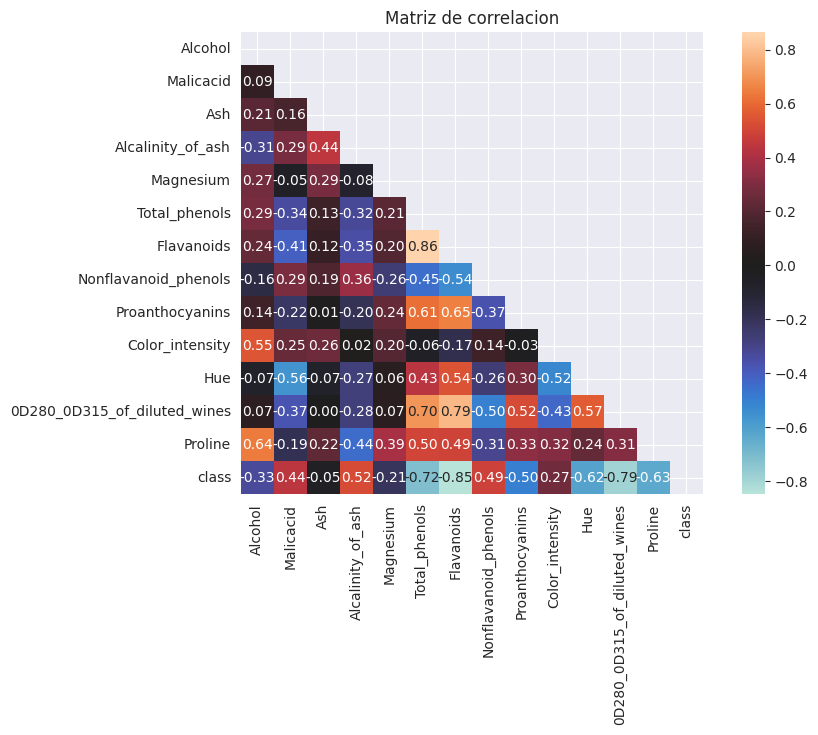

In [ ]:
df.corr()
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
plt.title('Matriz de correlacion')
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True)

plt.show()

las variable que mas se relaciona con la class que es la que queremos predecir son las siguientes:

* Flavanoids (-0.85): La correlación más fuerte con la clase.
* Total_phenols (-0.72): Segunda correlación más alta.
* OD280_OD315_of_diluted_wines (-0.79): Alta correlación negativa.
* Proline (-0.63): Correlación negativa considerable.
* Hue (-0.62): Correlación negativa notable.
* Alcohol (-0.33): Correlación negativa moderada.
* Alcalinity_of_ash (-0.21): Correlación negativa moderada.
* Malic acid (0.44): Correlación positiva moderada.
* Flavanouds

In [ ]:
X = df[['Alcohol', 'Malicacid', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']]
y = df['class']

In [ ]:
# Confirmamos la dimesionalidad
X.shape, y.shape

((178, 11), (178,))

In [ ]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud:',accuracy.round(2))
print(f'Matriz de confusion: \n{confusion_matrix(y_test, y_pred)}')
#print(f'Reporte de clasificacion :\n',classification_report(y_test, y_pred))

Exactitud: 0.94
Matriz de confusion: 
[[13  1  0]
 [ 0 13  0]
 [ 0  1  8]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



In [ ]:
# muestra
def muestra(a):
   muestra = X_test.iloc[[a]]
   return muestra

In [ ]:
# Hacemos la predicción
def prediccion(a):
    muestra_a = muestra(a)
    prediccion = model.predict(muestra_a)
    valor_real = y_test.iloc[a]

# Imprime los resultados
    print("Valor real:", valor_real)
    print("Predicción:", prediccion[0])

    # Comprueba si la predicción fue correcta
    if prediccion[0] == valor_real:
        print("El modelo acertó")
    else:
        print("El modelo fallo")

In [ ]:
# Predicion manual
prediccion(3)

Valor real: 2
Predicción: 2
El modelo acertó


# Conclusión

El modelo clasifica vinos con un 94% de precisión, utilizando características significativas, mostrando un Buen rendimiento.